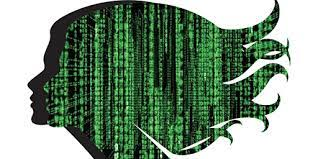

# <span style='color:#A80808'>Goal</span>

Examine the climate change from different perspectives, explore one dataset among several, spanning sectors including healthcare, energy and environmental protection.

# <span style='color:#A80808'>Data</span>
* Climate Change AI: Fine grained building energy usage data
* MIT Critical Data: CDC county level COVID data
* US Environmental Protection Agency (EPA): weather, air pollutant, and census data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['axes.facecolor']='gray'

from IPython.display import HTML

# <span style='color:#A80808'>Part I: CCAI: Gas consumption from individual buildings in France</span>


![](https://pbs.twimg.com/profile_images/1298643948/FranceFlag_svg_400x400.png)

In [ ]:
ccai = pd.read_csv('../input/phase-ii-widsdatathon2022/ccai/ccai/data.csv')
ccai.columns

* id: there are many duplicated ids, therefore this columns should be removed
* geometry: footprint polygon
* consumption: yearly gas consumption in MWh
* delivery_points: number of flats connected to the gas network
* coords_eobs: coordinate of the closest climate observations
* qq_dict: closest monthly global radiation observations
* height: building height (ground to lowest roof point), **there are 239 missing values**
* type: there are 7 building types
* age: building age, **there are 15909 missing values**
* floors: number of floors in the building, **there are 11617 missing values**
* alt_prec: altimetric precision of the building height, **there are only 4 unique values (1, 1.5, 2 and 9999)**
* wall_mat: wall material, **there are 13247 missing values**
* roof_mat: roof material, **there are 13248 missing values**

In [ ]:
ccai.info()

# <span style='color:#A80808'>Gas consumption over  the country</span>

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption.hist(bins=100, color='yellow')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in France', fontsize=16)
plt.show()

# <span style='color:#A80808'>Gas consumption in big cities</span>

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption.hist(bins=100, color='white', label='Whole country')
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'PARIS' in city])].hist(bins=100, color='yellow', label='in Paris')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in Paris', fontsize=16)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("white")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'MARSEILLE' in city])].hist(bins=100, color='yellow')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in Marseille', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'LYON' in city])].hist(bins=100, color='yellow')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in Lyon', fontsize=16)
plt.show()

# <span style='color:#A80808'>Gas consumption in small cities</span>

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'PAU' in city])].hist(bins=100, color='yellow')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in Pau', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'ANNECY' in city])].hist(bins=100, color='yellow')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in Annecy', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'LILLE' in city])].hist(bins=100, color='yellow')
plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of gas consumption by individual buildings in Lille', fontsize=16)
plt.show()

# <span style='color:#A80808'>An animation showing the histogram of all the cities</span>

In [ ]:
%%capture

fig, ax = plt.subplots(figsize=(10,7))

plt.xlabel('Consumption (MWh)', fontsize=16)
plt.ylabel('Count', fontsize=16)
_,_,hist = ax.hist(ccai.consumption, 100, color='white')

def update(idx, hist, city_names):
    df = ccai.consumption[ccai.city_name==city_names[idx]]
    n,_ = np.histogram(df, 100)
    for count, rect in zip(n, hist):
        rect.set_height(count)

    ax.set_ylim(0,np.max(n))
    ax.set_title(f'City: {city_names[idx]}', fontsize=16)
    return hist

ani = animation.FuncAnimation(fig, update, fargs=(hist, ccai.city_name.unique()),
                               interval=100, frames=ccai.city_name.nunique(), blit=False)

In [ ]:
HTML(ani.to_jshtml())

Note that you can use the button - or + to slow down or speed up the animation.

# <span style='color:#A80808'>Average of each city</span>

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(ccai.city_name.nunique()), ccai.groupby('city_name').consumption.mean().tolist(), color='white')
plt.xlabel('Cities', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption of each city', fontsize=16)
plt.show()

# <span style='color:#A80808'>The influence of the building type</span>

In [ ]:
ccai.type.unique()

In [ ]:
plt.figure(figsize=(10,5))
ccai.type.hist(bins=100, color='yellow', width=0.5)
plt.xticks(rotation=90, fontsize=16)
plt.ylabel('Log count', fontsize=16)
plt.yscale('log')
plt.title('Histogram of the building type', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.type.unique().tolist(), ccai.groupby('type').consumption.mean().tolist(), color='white')
plt.xticks(rotation=90, fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption for each bulding type', fontsize=16)
plt.show()

# <span style='color:#A80808'>The influence of the number of floors</span>

In [ ]:
np.sort(ccai.floors.unique())

In [ ]:
ccai.floors = ccai.floors.fillna(-1)

In [ ]:
plt.figure(figsize=(10,5))
ccai.floors.hist(bins=100, color='yellow')
plt.xlabel('Number of floors', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of the number of floors', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.floors.unique().tolist(), ccai.groupby('floors').consumption.mean().tolist(), color='white')
plt.xlabel('Number of floors', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus number of floors', fontsize=16)
plt.show()

We can observe that gas comsumption does not increase with increasing number of floors.

# <span style='color:#A80808'>The influence of the building footprint area</span>

In [ ]:
def area(txt):
    x = [float(s.split()[0]) for s in txt.replace('POLYGON','').replace('(','').replace(')','').split(',')]
    y = [float(s.split()[1]) for s in txt.replace('POLYGON','').replace('(','').replace(')','').split(',')]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

ccai['area'] = ccai.geometry.apply(lambda x: area(x))

In [ ]:
plt.figure(figsize=(10,5))
ccai.area.hist(bins=100, color='yellow')
plt.xlabel('Building area', fontsize=16)
plt.ylabel('Log count', fontsize=16)
plt.yscale('log')
plt.title('Histogram of the building area', fontsize=16)
plt.show()

In [ ]:
# Cut the building area into 100 categories
ccai['area_cut'] = pd.qcut(ccai.area,100, labels=range(100)).astype('category')

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.area_cut.unique().tolist(), ccai.groupby('area_cut').consumption.mean().tolist(), color='white')
plt.xlabel('Building area category', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus building area category', fontsize=16)
plt.show()

# <span style='color:#A80808'>The influence of the building height</span>

In [ ]:
ccai.height = ccai.height.fillna(-1)

In [ ]:
plt.figure(figsize=(10,5))
ccai.height.hist(bins=100, color='yellow')
plt.xlabel('Building height to roof base', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of the building height', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.height.unique().tolist(), ccai.groupby('height').consumption.mean().tolist(), color='white')
plt.xlabel('Building height', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus building height', fontsize=16)
plt.show()

Gas consumption is almost constant ($\approx$100 MWh) for most of the building height values.

# <span style='color:#A80808'>The influence of the building volume (height x area)</span>

In [ ]:
ccai['volume'] = ccai.height * ccai.area

In [ ]:
plt.figure(figsize=(10,5))
ccai.volume.hist(bins=100, color='yellow')
plt.xlabel('Building volume', fontsize=16)
plt.ylabel('Log count', fontsize=16)
plt.yscale('log')
plt.title('Histogram of the building volume', fontsize=16)
plt.show()

In [ ]:
# Cut the building volume into 50 categories
ccai['volume_cut'] = pd.qcut(ccai.volume, 50, labels=range(50)).astype('category')

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.volume_cut.unique().tolist(), ccai.groupby('volume_cut').consumption.mean().tolist(), color='white')
plt.xlabel('Building volume category', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus building volume category', fontsize=16)
plt.show()

# <span style='color:#A80808'>The influence of the number of flats in the building connected to gas network</span>

In [ ]:
plt.figure(figsize=(10,5))
ccai.delivery_points.hist(bins=100, color='yellow')
plt.xlabel('Number of flats connected to gas network', fontsize=16)
plt.ylabel('Log count', fontsize=16)
plt.yscale('log')
plt.title('Histogram of the delivery points', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.delivery_points.unique().tolist(), ccai.groupby('delivery_points').consumption.mean().tolist(), color='white')
plt.xlabel('Number of flats connected to gas network', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus delivery points', fontsize=16)
plt.show()

# <span style='color:#A80808'>The influence of wall/roof material</span>

In [ ]:
ccai.wall_mat = ccai.wall_mat.fillna(-1)
ccai.roof_mat = ccai.roof_mat.fillna(-1)

In [ ]:
plt.figure(figsize=(10,5))
ccai.wall_mat.hist(bins=100, color='yellow', label='Wall')
ccai.roof_mat.hist(bins=100, color='white', label='Roof')
plt.xlabel('Materials', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of the materials', fontsize=16)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("white")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.wall_mat.unique().tolist(), ccai.groupby('wall_mat').consumption.mean().tolist(), color='white')
plt.xlabel('Wall materials', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus wall materials', fontsize=16)
plt.show()

In [ ]:
ccai.roof_mat.unique()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.roof_mat.unique().tolist(), ccai.groupby('roof_mat').consumption.mean().tolist(), color='white')
plt.xlabel('Roof materials', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus roof materials', fontsize=16)
plt.show()

# <span style='color:#A80808'>The influence of building age</span>

In [ ]:
ccai.age = ccai.age.fillna('1000-00-00')
ccai['year'] = ccai.age.apply(lambda x: int(x.split('-')[0]))

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(ccai.year.sort_values().unique(), ccai.groupby('age').consumption.mean().tolist(), color='white', width=5)
plt.xlabel('Age of the building', fontsize=16)
plt.ylabel('Mean consumption (MWh)', fontsize=16)
plt.title('Mean consumption versus building age', fontsize=16)
plt.show()

# <span style='color:#A80808'>Part II: Air quality in US counties</span>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/USA_Flag_Map.svg/2560px-USA_Flag_Map.svg.png)

In [ ]:
%%capture
# install openpyxl for reading xlsx format
!pip install openpyxl

In [ ]:
air_quality = pd.read_excel('../input/phase-ii-widsdatathon2022/epa/epa/Datathon_EPA_Air_Quality_Demographics_Meteorology_2019.xlsx')
air_quality.DATE = pd.to_datetime(air_quality.DATE)
air_quality.columns

In [ ]:
print(f'Data is measured from {air_quality.DATE.min()} to {air_quality.DATE.max()}')

# <span style='color:#A80808'>Histogram of particulate patter PM2.5</span>

Good air quality corresponds to PM2.5 <15 ($\mu g/m^3$)

In [ ]:
plt.figure(figsize=(10,5))
air_quality.PM25_UG_PER_CUBIC_METER.hist(bins=100, color='yellow')
plt.xlabel(r'PM25 ($\mu g/m^3$)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of PM2.5 in US counties', fontsize=16)
plt.show()

# <span style='color:#A80808'>Animate histograms of states</span>

In [ ]:
%%capture

fig, ax = plt.subplots(figsize=(10,7))

plt.xlabel(r'PM25 ($\mu g/m^3$)', fontsize=16)
plt.ylabel('Count', fontsize=16)
_,_,hist = ax.hist(air_quality.PM25_UG_PER_CUBIC_METER, 100, color='white')

def update(idx, hist, STATES):
    df = air_quality.PM25_UG_PER_CUBIC_METER[air_quality.STATE==STATES[idx]]
    n,_ = np.histogram(df, 100)
    for count, rect in zip(n, hist):
        rect.set_height(count)

    ax.set_ylim(0,np.max(n))
    ax.set_title(f'State: {STATES[idx]}', fontsize=16)
    return hist

ani = animation.FuncAnimation(fig, update, fargs=(hist, air_quality.STATE.unique()),
                               interval=500, frames=air_quality.STATE.nunique(), blit=False)

In [ ]:
HTML(ani.to_jshtml())

# <span style='color:#A80808'>Animate histograms of counties</span>

In [ ]:
%%capture

fig, ax = plt.subplots(figsize=(10,7))

plt.xlabel(r'PM25 ($\mu g/m^3$)', fontsize=16)
plt.ylabel('Count', fontsize=16)
_,_,hist = ax.hist(air_quality.PM25_UG_PER_CUBIC_METER, 100, color='white')

def update(idx, hist, COUNTIES):
    df = air_quality.PM25_UG_PER_CUBIC_METER[air_quality.COUNTY==COUNTIES[idx]]
    n,_ = np.histogram(df, 100)
    for count, rect in zip(n, hist):
        rect.set_height(count)

    ax.set_ylim(0,np.max(n))
    ax.set_title(f'County: {COUNTIES[idx]}', fontsize=16)
    return hist

ani = animation.FuncAnimation(fig, update, fargs=(hist, air_quality.COUNTY.unique()),
                               interval=500, frames=air_quality.COUNTY.nunique(), blit=False)

In [ ]:
HTML(ani.to_jshtml())

# <span style='color:#A80808'>PM25 distribution on the map</span>

In [ ]:
%%capture
!rm -rf GLC
!git clone https://github.com/maximiliense/GLC

In [ ]:
from GLC.plotting import plot_map

fig = plt.figure(figsize=(10, 5.5))
ax = plot_map(region="us")
    
ax.scatter(air_quality.LONGITUDE, air_quality.LATITUDE, color="blue", s=(air_quality.PM25_UG_PER_CUBIC_METER+4.3)/95.1*100, alpha=(air_quality.PM25_UG_PER_CUBIC_METER+4.3)/95.1)
ax.set_title(f'PM2.5 in different counties')

plt.show()